In [35]:
#라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import normal

In [36]:
#------------#
# Parameters #
#------------#
N=10            # 샘플을 취득하는 위치 x의 개수
M=[0,1,3,9]     # 다항식의 차수

In [46]:
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale = 0.3) #add error
        dataset = dataset.append(Series([x,y],index('x','y')),
                                 ignore_index = True)
    return dataset

In [47]:
train_set = create_dataset(N)
test_set = create_dataset(N)
df_ws = DataFrame()

Text(0.5,1,'dataset')

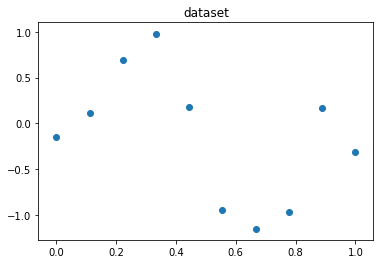

In [48]:
X = train_set['x']
Y = train_set['y']
scatter = plt.scatter(X,Y)
plt.title('dataset')

In [44]:
# 제곱근 평균 제곱 오차(Root mean square error) 계산
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

# 최소 제곱법으로 계산하기
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return (f, ws)

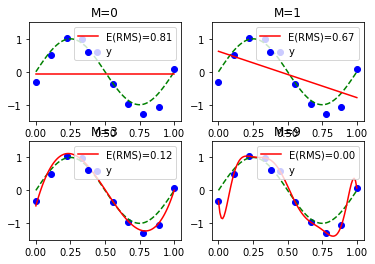

In [45]:
# 다항식 근사의 곡선을 구하여 표시
fig = plt.figure()
for c, m in enumerate(M):
    f, ws = resolve(train_set, m)
    df_ws = df_ws.append(Series(ws,name="M=%d" % m))

    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % m)

    # 트레이닝 세트 표시
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

    # sin곡선을 표시
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 근사 곡선 표시
    linex = np.linspace(0,1,101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)